In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

Load Data and shows first 10 rows of data.

In [2]:
data=pd.read_csv("archive.zip")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Drop unnecessary values

In [22]:
data_new=data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
data_new.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [24]:
data.fillna({'Age':0})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Calculates statistical values and rounds them to 3 decimal places.

In [6]:
data_new.describe().round(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,714.000,891.000,891.000,891.000
mean,0.384,2.309,29.699,0.523,0.382,32.204
std,0.487,0.836,14.526,1.103,0.806,49.693
min,0.000,1.000,0.420,0.000,0.000,0.000
25%,0.000,2.000,20.125,0.000,0.000,7.910
50%,0.000,3.000,28.000,0.000,0.000,14.454
75%,1.000,3.000,38.000,1.000,0.000,31.000
max,1.000,3.000,80.000,8.000,6.000,512.329


Mark null values as True and returns sum of number of True values in each column.

In [7]:
data_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Handling Null Values and Pre Processing the dataset.

In [8]:
data_new['Age']=data_new['Age'].fillna(data_new['Age'].mean())
data_new['Fare']=data_new['Fare'].fillna(data_new['Fare'].mean())
data_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Data Visualization

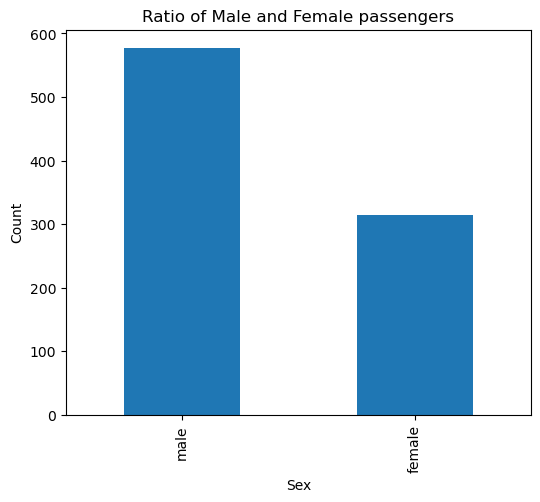

In [9]:
ax=data_new['Sex'].value_counts().plot(kind='bar',x = 'Survived',figsize=(6,5))    # creating coundplot
plt.title("Ratio of Male and Female passengers")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.show()

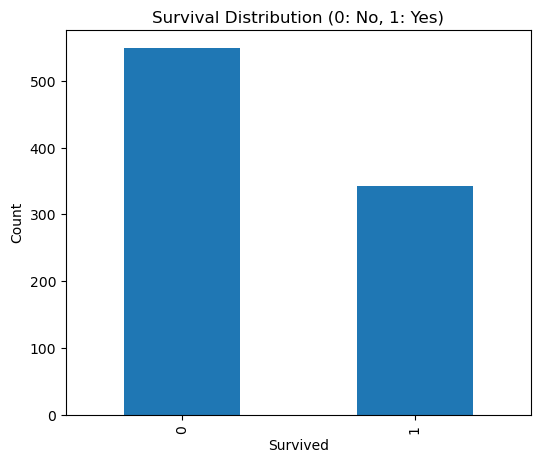

In [10]:
ax=data_new['Survived'].value_counts().plot(kind='bar',figsize=(6,5))    # creating coundplot
plt.title("Survival Distribution (0: No, 1: Yes)")
plt.ylabel("Count")
plt.xlabel("Survived")
plt.show()

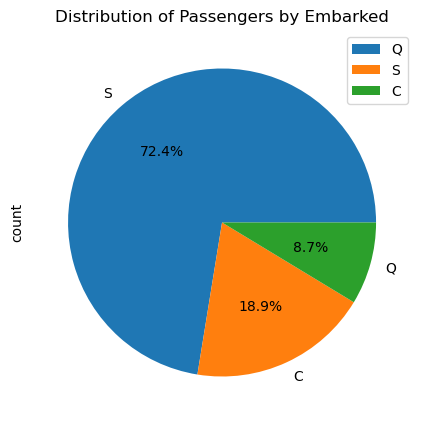

In [11]:
ax=data_new['Embarked'].value_counts().plot(kind='pie',figsize=(6,5),autopct='%1.1f%%')
plt.title("Distribution of Passengers by Embarked")
plt.legend(["Q", "S", "C"])
plt.show()

[]

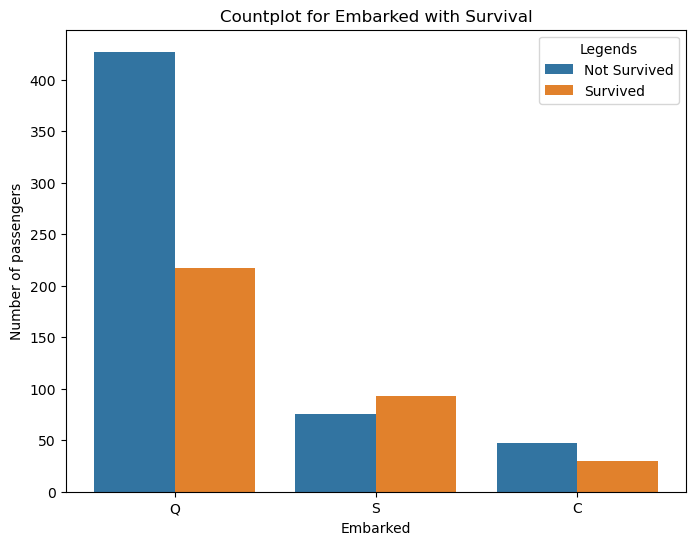

In [12]:
_, ax = plt.subplots(figsize = (8, 6))
snr.countplot(data = data_new, x = "Embarked", hue = "Survived", ax = ax)
ax.set_title("Countplot for Embarked with Survival")
ax.set_xlabel("Embarked")
ax.set_xticklabels(["Q", "S", "C"])
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.plot()

Change the catagorical data into numerical data by using OneHotEncoding.

In [14]:
data_new['Sex']=data_new['Sex'].apply({'male':1,'female':0}.get)
data_new['Embarked']=data_new['Embarked'].apply({'S':1,'Q':2,'C':3}.get)
data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,3.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


Dividing the data into Dependent and Independent variables.

In [15]:
x=data_new.drop(['Survived'],axis=1)
y=data_new['Survived']

Dividing the cleaned data into training and testing sets.

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

Creating first machine learning model 'Decision Tree Classifier'.

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

Train the model

In [39]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
predictions=tree.predict(x_test)
print(predictions)

[0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1]


Check the Confusion metrix and Accuracy score

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [42]:
print(cm)

[[97 12]
 [24 46]]


In [43]:
print(ac)

0.7988826815642458
